# РК-2

Трифонов Дмитрий Алексеевич, ИУ5-65Б, Вариант 18

## Задание

- Дан набор данных: https://www.kaggle.com/rhuebner/human-resources-data-set
- Для этого набора данных необходимо построить модель классификации (регрессии).
- Необходимо использовать метод опорных векторов и градиентный бустинг.
- Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик).
- Какие метрики качества Вы использовали и почему?
- Какие выводы Вы можете сделать о качестве построенных моделей?
- Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

## Импорт зависимостей

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Первичный анализ данных

In [3]:
df = pd.read_csv("HRDataset_v14.csv")

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

### Корреляционная матрица

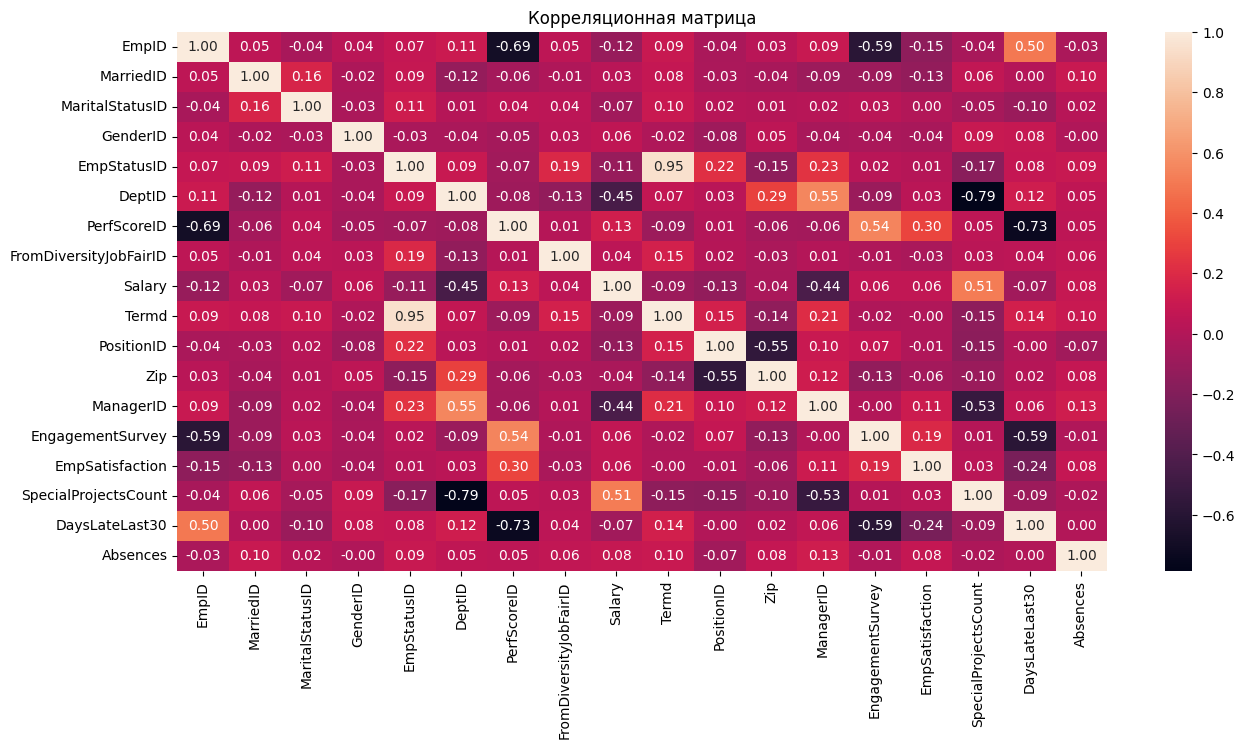

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
ax.set_title('Корреляционная матрица')
plt.show()

**Вывод**: Будем решать задачу регрессии для признака `Salary` (предсказание зарплаты сотрудника по его характеристикам)

## Обработка пропусков

In [11]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Единственная колонка с пропусками - `DateOfTermination`, но её мы не будем использовать для обучения.

Поэтому можно считать, что в исходном датасете пропусков нет.

### Удаление ненужных колонок

In [34]:
# normalize: 
# categorize: 
df = df.drop(columns=['Employee_Name', 'EmpID', 'Position', 'Zip', 'Sex',
                      'MaritalDesc', 'CitizenDesc', 'LastPerformanceReview_Date',
                      'ManagerName', 'EmploymentStatus', 'TermReason',
                      'DateofTermination', 'DateofHire', 'ManagerID'])

Колонку `DOB` (Date of Birth) заменим на соответствующую ей колонку `Age`

In [39]:
df['DOB'] = pd.to_datetime(df['DOB'])

current_date = datetime.now()
df['Age'] = df['DOB'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))
df.drop(columns=['DOB'], inplace=True)

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_7884\2028958031.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


### Кодирование признаков

In [44]:
label_encoder = LabelEncoder()

for col_name in ['State', 'PerformanceScore', 'RecruitmentSource', 'Department', 'RaceDesc', 'HispanicLatino']:
    df[col_name] = label_encoder.fit_transform(df[col_name])

df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,RaceDesc,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,0.0,0.00,1.0,0.0,0.8,1.000000,0.0,62506,0.0,0.620690,...,5,3,5,0,4.60,5,0,0,1,40
1,1.0,0.25,1.0,1.0,0.4,0.666667,0.0,104437,1.0,0.896552,...,5,2,4,1,4.96,3,6,0,17,49
2,1.0,0.25,0.0,1.0,0.8,0.666667,0.0,64955,1.0,0.655172,...,5,3,5,1,3.02,3,0,0,3,35
3,1.0,0.25,0.0,0.0,0.8,0.666667,0.0,64991,0.0,0.620690,...,5,3,4,1,4.84,5,0,0,15,35
4,0.0,0.50,0.0,1.0,0.8,0.666667,0.0,50825,1.0,0.620690,...,5,3,3,1,5.00,4,0,0,2,34


### Масштабирование признаков

In [57]:
df_scaler = MinMaxScaler()

df_columns = df.columns.to_list()
df_columns.remove('Salary')

for col_name in df_columns:
    df[[col_name]] = df_scaler.fit_transform(df[[col_name]])

df.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,RaceDesc,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,0.0,0.00,1.0,0.0,0.8,1.000000,0.0,62506,0.0,0.620690,...,1.0,0.6,0.625,0.000000,0.896907,1.00,0.00,0.0,0.000000,0.90
1,1.0,0.25,1.0,1.0,0.4,0.666667,0.0,104437,1.0,0.896552,...,1.0,0.4,0.500,0.333333,0.989691,0.50,0.75,0.0,0.842105,0.99
2,1.0,0.25,0.0,1.0,0.8,0.666667,0.0,64955,1.0,0.655172,...,1.0,0.6,0.625,0.333333,0.489691,0.50,0.00,0.0,0.105263,0.85
3,1.0,0.25,0.0,0.0,0.8,0.666667,0.0,64991,0.0,0.620690,...,1.0,0.6,0.500,0.333333,0.958763,1.00,0.00,0.0,0.736842,0.85
4,0.0,0.50,0.0,1.0,0.8,0.666667,0.0,50825,1.0,0.620690,...,1.0,0.6,0.375,0.333333,1.000000,0.75,0.00,0.0,0.052632,0.84


Выбор метрик

**Mean absolute error** - средняя абсолютная ошибка
$$MAE(y,\hat{y})=\frac{1}{N}\Sigma^{N}_{i=1}|y_i−\hat{y_i}|$$
где:

$$y\text{ - истинное значение целевого признака} $$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции mean_absolute_error.

**Mean squared error** - средняя квадратичная ошибка
$$MSE(y,\hat{y})=\frac{1}{N}\Sigma^{N}_{i=1}(y_i−\hat{y_i})2$$
где:

$$y \text{- истинное значение целевого признака}$$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$
 
Вычисляется с помощью функции mean_squared_error.


**Метрика R2** или коэффициент детерминации
$$R^2(y,\hat{y} )=1− \frac{\Sigma^{N}_{i=1} (y_i - \hat{y_i^2})}{\Sigma^{N}_{i=1} (y_i - \hat{y_i^2})}$$
где:

$$y \text{ - истинное значение целевого признака}$$
$$\hat{y} \text{- предсказанное значение целевого признака}$$
$$N \text{- размер тестовой выборки}$$
$$\overline{y_i}=\frac{1}{N} \cdot \Sigma^{N}_{i=1}y_i$$
Вычисляется с помощью функции r2_score.

Метрика R2 показывает относительное отклонение предсказанных значений от реальных, в то время как MAE и MSE показывают ошибку в единицах измерения целевого признака.
Так как метрика R2 в одиночку достаточно неточная, MAE и MSE гармонично её дополняют и в совокупности дают полную картину о точности модели. 

## Разбиение датасета на обучающую и тестовую выборки

In [61]:
x_df = df.drop(columns='Salary')
y_df = df['Salary']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=73)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(233, 21) (233,)
(78, 21) (78,)


## Обучение моделей

In [63]:
svr  = SVR()
gbr = GradientBoostingRegressor()

In [64]:
svr.fit(x_train, y_train)

SVR()

In [65]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

## Получение предсказаний от моделей

In [68]:
svr_predict = svr.predict(x_test)
gbr_predict = gbr.predict(x_test)

## Оценка качества моделей

In [73]:
print('Показатели модели опорных векторов:')
print('MAE: {}, MSE: {}, R^2: {}'.format(mean_absolute_error(y_test, svr_predict), mean_squared_error(y_test, svr_predict), r2_score(y_test, svr_predict)))

Показатели модели опорных векторов:
MAE: 12362.747063462844, MSE: 358378461.59747463, R^2: -0.045443312148570225


In [75]:
print('Показатели модели градиентного бустинга:')
print('MAE: {}, MSE: {}, R^2: {}'.format(mean_absolute_error(y_test, gbr_predict), mean_squared_error(y_test, gbr_predict), r2_score(y_test, gbr_predict)))

Показатели модели градиентного бустинга:
MAE: 9033.43305105141, MSE: 196777528.3863341, R^2: 0.42597066208828205


## Вывод

Как видим, модели получились не очень качественные (большая MAE), что связанно с маленьким объёмом данных (около 300 строк)

Более точная оказалась модель градиентного бустинга.